In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('..')
from load_data.load_data import MPKGraphLoader, Stop, get_line_colors, TramGraphLoader, BusGraphLoader
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point

### Ładowanie grafu z plików xml i zapisanie do plików pickle

Jako ścieżkę podaj ścieżkę do folderu zawierającego plik **stops.txt** i folder **lines**

In [4]:
XML_PATH_2023 = './data/xmls_2023/'
XML_PATH_2024 = './data/xmls_2024/'

In [7]:
PATH_2023 = './data/mpk_graph_loader_2023.pkl'
PATH_2024 = './data/mpk_graph_loader_2024.pkl'

TRAM_PATH_2023 = './data/tram_graph_loader_2023.pkl'
TRAM_PATH_2024 = './data/tram_graph_loader_2024.pkl'

BUS_PATH_2023 = './data/bus_graph_loader_2023.pkl'
BUS_PATH_2024 = './data/bus_graph_loader_2024.pkl'

In [8]:
loader_2023 = MPKGraphLoader(XML_PATH_2023, transfer_time=5.0)
loader_2023.to_pickle(PATH_2023)

loader_2024 = MPKGraphLoader(XML_PATH_2024, transfer_time=5.0)
loader_2024.to_pickle(PATH_2024)

tram_loader_2023 = TramGraphLoader(XML_PATH_2023, transfer_time=5.0)
tram_loader_2023.to_pickle(TRAM_PATH_2023)
tram_loader_2024 = TramGraphLoader(XML_PATH_2024, transfer_time=5.0)
tram_loader_2024.to_pickle(TRAM_PATH_2024)

bus_loader_2023 = BusGraphLoader(XML_PATH_2023, transfer_time=5.0)
bus_loader_2023.to_pickle(BUS_PATH_2023)
bus_loader_2024 = BusGraphLoader(XML_PATH_2024, transfer_time=5.0)
bus_loader_2024.to_pickle(BUS_PATH_2024)

100%|██████████| 75/75 [01:15<00:00,  1.01s/it]


### Ładowanie grafu z plików pickle

In [ ]:
loader_2023 = MPKGraphLoader.from_pickle(PATH_2023)
loader_2024 = MPKGraphLoader.from_pickle(PATH_2024)

### Dostęp do grafów poszczególnych linii

In [10]:
line_graph = loader_2023['11']
type(line_graph)

networkx.classes.digraph.DiGraph

### Dostęp do pełnego multigrafu komunikacji miejskiej

In [5]:
multigraph = loader_2023.multigraph
type(multigraph)

networkx.classes.digraph.DiGraph

### Dostęp do przystanków o danej nazwie

In [12]:
loader_2023.get_stop('pl. grunwaldzki')

[line 151: "pl. grunwaldzki",
 line c: "pl. grunwaldzki",
 line d: "pl. grunwaldzki",
 line 1: "pl. grunwaldzki",
 line 2: "pl. grunwaldzki",
 line 4: "pl. grunwaldzki",
 line 10: "pl. grunwaldzki",
 line 16: "pl. grunwaldzki",
 line 33: "pl. grunwaldzki",
 line 70: "pl. grunwaldzki",
 line 111: "pl. grunwaldzki",
 line 115: "pl. grunwaldzki",
 line 116: "pl. grunwaldzki",
 line 121: "pl. grunwaldzki",
 line 131: "pl. grunwaldzki",
 line 145: "pl. grunwaldzki",
 line 146: "pl. grunwaldzki",
 line 149: "pl. grunwaldzki"]

In [10]:
s = loader_2023.get_stop('pl. grunwaldzki')[0]
s.lat, s.lon

(51.111746845625, 17.061435821875)

In [11]:
s = loader_2023.get_stop('kromera')[0]
s.lat, s.lon

(51.131949363000004, 17.064928504)

In [16]:
s = loader_2023.get_stop('pl. wróblewskiego')[0]
s.lat, s.lon

(51.10530141833333, 17.047809525)

In [6]:
stops = []
for name in loader_2023.stop_names:
    stop = loader_2023.get_stop(name)[0]
    d = {
        'region_id': name,
        'geometry': Point(stop.lon, stop.lat)
    }
    stops.append(d)

points = gpd.GeoDataFrame.from_dict(stops)
points.head()

,region_id,geometry
0,starodworska,POINT (17.10857 51.07386)
1,pracze widawskie,POINT (17.01560 51.17768)
2,młodych techników,POINT (17.01216 51.11282)
3,muchobór mały (stacja kolejowa),POINT (16.97060 51.11258)
4,kasprowicza,POINT (17.05343 51.13777)


### Lista przystanków dostępnych w danym czasie

`transfer_time` jest opcjonalny i służy temu żeby overrideować ten defaultowo ustawiony w konstruktorze.

In [6]:
stops: set[Stop] = loader_2023.get_stops_in_range('pl. grunwaldzki', max_time=10, transfer_time=5)
stop_names: set[str] = set(map(lambda stop: stop.name, stops))
stop_names

{'8 maja',
 'bujwida',
 'chełmońskiego',
 'chopina',
 'dworzec główny',
 'galeria dominikańska',
 'godebskiego (awf wrocław)',
 'grunwaldzka',
 'górnickiego',
 'hala stulecia',
 'karłowicza',
 'katedra',
 'kliniki - politechnika wrocławska',
 'kochanowskiego',
 'krasińskiego',
 'kwidzyńska',
 'mickiewicza',
 'monopolowa',
 'monte cassino',
 'most grunwaldzki',
 'nowowiejska',
 'ogród botaniczny',
 'okrzei',
 'park szczytnicki',
 'partyzantów',
 'piastowska',
 'piramowicza',
 'pl. bema',
 'pl. grunwaldzki',
 'pl. wróblewskiego',
 'poczta główna',
 'prusa',
 'reja',
 'skwer krasińskiego',
 'spółdzielcza',
 'stadion olimpijski',
 'sępolno',
 'słowiańska',
 'tramwajowa',
 'urząd wojewódzki (impart)',
 'urząd wojewódzki (muzeum narodowe)',
 'wyszyńskiego',
 'wzgórze partyzantów',
 'zacisze',
 'zamkowa',
 'zoo',
 'śniadeckich',
 'świdnicka',
 'świętokrzyska'}

### Otrzymywanie podgrafu dla konkretnych linii
`tram_line_names: list[str]` - zwraca nazwy wszystkich linii tramwajowych

`bus_line_names: list[str]` - zwraca nazwy wszystkich linii autobusowych

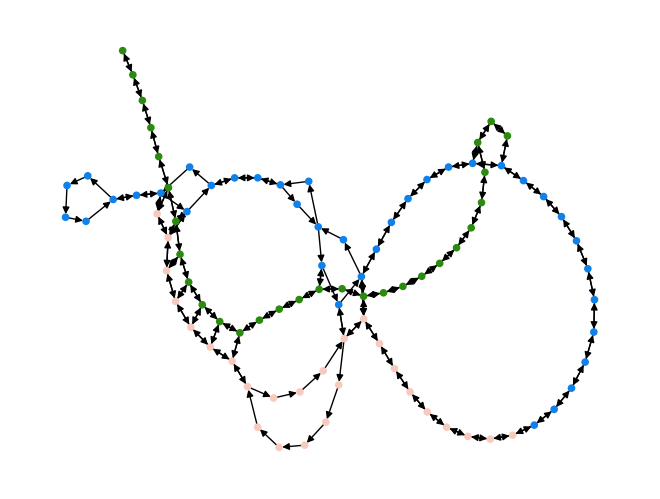

In [14]:
subgraph = loader_2023.get_sugraph(['11', '6', 'a'])
nx.draw_kamada_kawai(subgraph, node_size=20, node_color=get_line_colors(subgraph))